In [1]:
import pandas as pd
import numpy as np
import seaborn

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Function for Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# Read data
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df = df.sample(frac = 1)

# Check target
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [4]:
# sample is unbalanced

In [5]:
# Take a part of the sample so that it is balanced
df_0 = df[df.isFraud == 0].iloc[:10000, :]
df_1 = df[df.isFraud == 1]

df = pd.concat([df_0,df_1])
df.isFraud.value_counts()

isFraud
0    10000
1     8213
Name: count, dtype: int64

In [6]:
# Check dublicated rows
df.duplicated().sum()

np.int64(0)

In [7]:
# Check NaN
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4895024,349,PAYMENT,20450.42,C1503222643,126986.88,106536.46,M1837577323,0.00,0.00,0,0
2458492,203,PAYMENT,11653.65,C2098733883,4236.00,0.00,M838773819,0.00,0.00,0,0
2143377,184,CASH_IN,97516.19,C432694190,1115.00,98631.19,C1128870650,174326.75,76810.56,0,0
1007327,46,PAYMENT,41793.00,C842370695,65067.09,23274.09,M746922498,0.00,0.00,0,0
3582292,261,PAYMENT,2584.59,C392388455,59849.00,57264.41,M1401612257,0.00,0.00,0,0


## Visualize   data ##

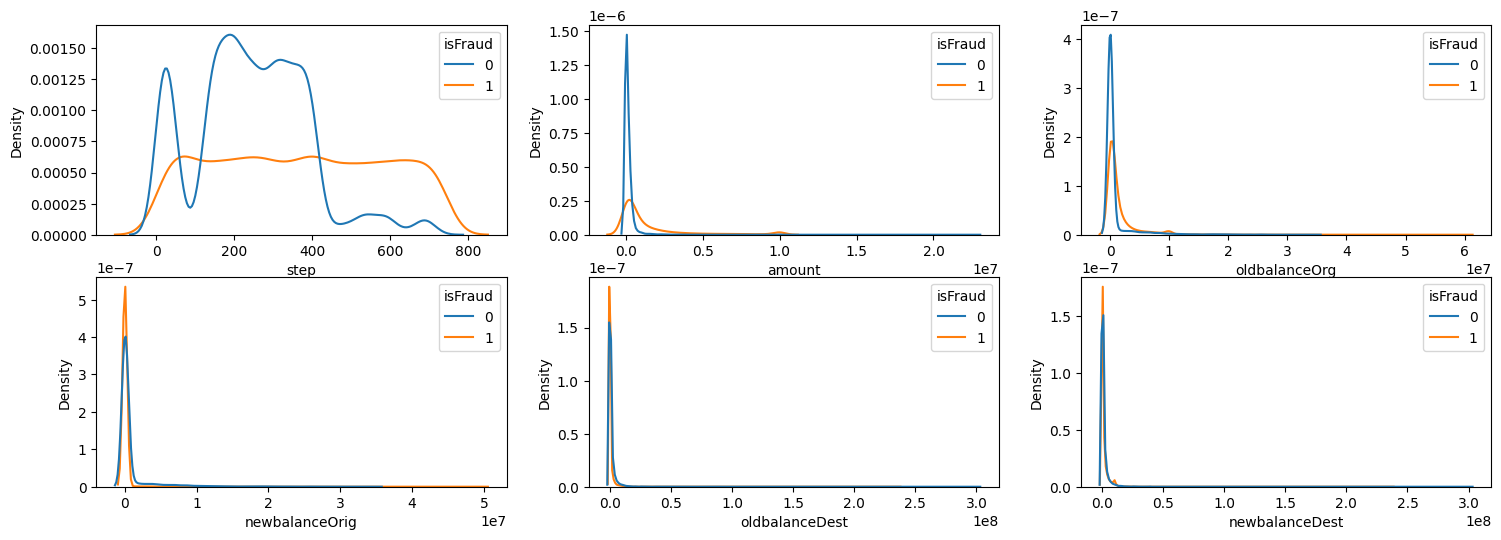

In [9]:
fig, axes = plt.subplots(2,3, figsize = (18,6))
i,j = [0,0]
for num_col in list(df._get_numeric_data().columns[:-2]):
    sns.kdeplot(data = df, x = num_col, hue = 'isFraud', ax = axes[i][j] )
    j+=1
    if j == 3:
        j = 0
        i += 1

Сцществуют транзакции с очень большими суммами. Найдем 75%-квантиль

In [10]:
int(df.describe().loc['75%', 'amount'])

480016

<Axes: xlabel='type', ylabel='Count'>

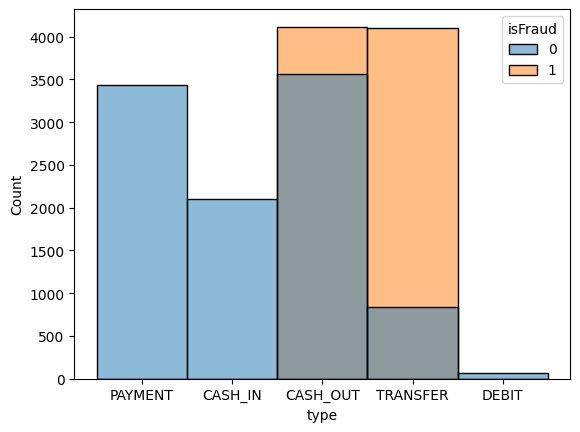

In [11]:
sns.histplot(data = df, x = 'type',  hue = 'isFraud')

In [12]:
# Drop extra column
df = df.copy().drop(['isFlaggedFraud'], axis = 1)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4895024,349,PAYMENT,20450.42,C1503222643,126986.88,106536.46,M1837577323,0.00,0.00,0
2458492,203,PAYMENT,11653.65,C2098733883,4236.00,0.00,M838773819,0.00,0.00,0
2143377,184,CASH_IN,97516.19,C432694190,1115.00,98631.19,C1128870650,174326.75,76810.56,0
1007327,46,PAYMENT,41793.00,C842370695,65067.09,23274.09,M746922498,0.00,0.00,0
3582292,261,PAYMENT,2584.59,C392388455,59849.00,57264.41,M1401612257,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6272937,625,CASH_OUT,2654302.46,C2084273569,2654302.46,0.00,C1817408357,1429770.91,4084073.37,1
6272928,624,TRANSFER,24366.07,C113775713,24366.07,0.00,C405489983,0.00,0.00,1
3960286,292,TRANSFER,38513.19,C472317235,38513.19,0.00,C1356666800,0.00,0.00,1
6113304,526,TRANSFER,200008.33,C136863855,200008.33,0.00,C461054573,0.00,0.00,1


<Axes: >

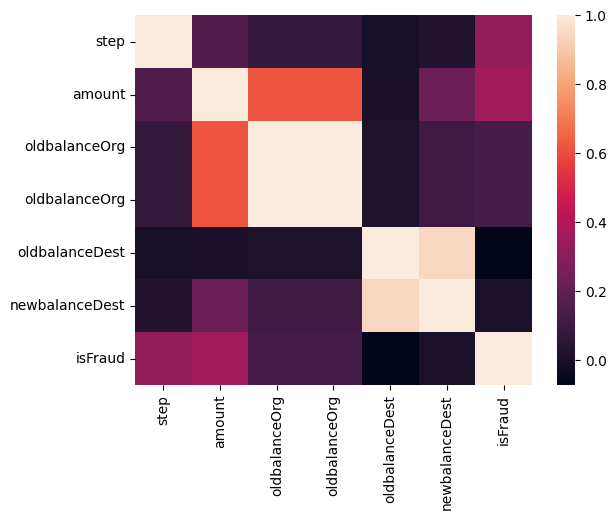

In [13]:
# Plot Correlation Matrix with seaborn
corr = df.loc[:, ['step', 'amount', 'oldbalanceOrg', 'oldbalanceOrg',
                   'oldbalanceDest', 'newbalanceDest','isFraud']].corr()
sns.heatmap(corr)

## Feature engeneering ##

1. Разница в балансе. Отметим, что сумма, списанная со счета отправителя, зачисляется на счет получателя без отклонений в центах. Но что делать, если существует отклонение в дебетовой и кредитовой суммах. Некоторые из них могут быть вызваны комиссиями, взымаемыми поставщиками услуг

2. Индикатор всплеска: Также нам необходимо установить флаг, когда в транзакцию вовлечена большая сумма. Из распределения сумм мы поняли, что у нас много выбросов с большими суммами в транзакциях. Поэтому в качестве порога мы рассматриваем 75-й процентиль (208 тыс.), а сумма, превышающая 208 тыс., будет отмечена флажком.

3. Индикатор частоты: Здесь мы отмечаем пользователя. Когда получатель получает деньги от многих людей, это может стать триггером, так как это может быть связано с некоторыми незаконными азартными играми. Поэтому флаг ставится, если получатель получает деньги более 20 раз.

4.  Индикатор торговца: Идентификаторы клиентов в приемнике начинаются с 'M', что означает, что они являются торговцами и, очевидно, у них будет много транзакций по приему денег. Поэтому мы также отмечаем, когда есть получатель-торговец.

In [14]:
# Difference balances
df['balance_diff_orig'] = df['newbalanceOrig']-df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest']-df['oldbalanceDest']
df = df.drop(['newbalanceOrig', 'oldbalanceOrg', 'newbalanceDest','oldbalanceDest' ], axis =1)
df

,step,type,amount,nameOrig,nameDest,isFraud,balance_diff_orig,balance_diff_dest
4895024,349,PAYMENT,20450.42,C1503222643,M1837577323,0,-20450.42,0.00
2458492,203,PAYMENT,11653.65,C2098733883,M838773819,0,-4236.00,0.00
2143377,184,CASH_IN,97516.19,C432694190,C1128870650,0,97516.19,-97516.19
1007327,46,PAYMENT,41793.00,C842370695,M746922498,0,-41793.00,0.00
3582292,261,PAYMENT,2584.59,C392388455,M1401612257,0,-2584.59,0.00
...,...,...,...,...,...,...,...,...
6272937,625,CASH_OUT,2654302.46,C2084273569,C1817408357,1,-2654302.46,2654302.46
6272928,624,TRANSFER,24366.07,C113775713,C405489983,1,-24366.07,0.00
3960286,292,TRANSFER,38513.19,C472317235,C1356666800,1,-38513.19,0.00
6113304,526,TRANSFER,200008.33,C136863855,C461054573,1,-200008.33,0.00


In [15]:
# Surge indicator
df['surge']=[1 if n>208000 else 0 for n in df['amount']]

In [16]:
#Frequency indicator
df['freq_Dest']=df['nameDest'].map(df['nameDest'].value_counts())
df['freq_dest']=[1 if n>20 else 0 for n in df['freq_Dest']]
df = df.drop(['freq_Dest'], axis = 1)
df

,step,type,amount,nameOrig,nameDest,isFraud,balance_diff_orig,balance_diff_dest,surge,freq_dest
4895024,349,PAYMENT,20450.42,C1503222643,M1837577323,0,-20450.42,0.00,0,0
2458492,203,PAYMENT,11653.65,C2098733883,M838773819,0,-4236.00,0.00,0,0
2143377,184,CASH_IN,97516.19,C432694190,C1128870650,0,97516.19,-97516.19,0,0
1007327,46,PAYMENT,41793.00,C842370695,M746922498,0,-41793.00,0.00,0,0
3582292,261,PAYMENT,2584.59,C392388455,M1401612257,0,-2584.59,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6272937,625,CASH_OUT,2654302.46,C2084273569,C1817408357,1,-2654302.46,2654302.46,1,0
6272928,624,TRANSFER,24366.07,C113775713,C405489983,1,-24366.07,0.00,0,0
3960286,292,TRANSFER,38513.19,C472317235,C1356666800,1,-38513.19,0.00,0,0
6113304,526,TRANSFER,200008.33,C136863855,C461054573,1,-200008.33,0.00,0,0


In [17]:
df.freq_dest.value_counts()

freq_dest
0    18213
Name: count, dtype: int64

In [18]:
#Tracking the receiver as merchant or not
values = ['M']
conditions = list(map(df['nameDest'].str.contains, values))
df['merchant'] = np.select(conditions, '1', '0')
df

,step,type,amount,nameOrig,nameDest,isFraud,balance_diff_orig,balance_diff_dest,surge,freq_dest,merchant
4895024,349,PAYMENT,20450.42,C1503222643,M1837577323,0,-20450.42,0.00,0,0,1
2458492,203,PAYMENT,11653.65,C2098733883,M838773819,0,-4236.00,0.00,0,0,1
2143377,184,CASH_IN,97516.19,C432694190,C1128870650,0,97516.19,-97516.19,0,0,0
1007327,46,PAYMENT,41793.00,C842370695,M746922498,0,-41793.00,0.00,0,0,1
3582292,261,PAYMENT,2584.59,C392388455,M1401612257,0,-2584.59,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6272937,625,CASH_OUT,2654302.46,C2084273569,C1817408357,1,-2654302.46,2654302.46,1,0,0
6272928,624,TRANSFER,24366.07,C113775713,C405489983,1,-24366.07,0.00,0,0,0
3960286,292,TRANSFER,38513.19,C472317235,C1356666800,1,-38513.19,0.00,0,0,0
6113304,526,TRANSFER,200008.33,C136863855,C461054573,1,-200008.33,0.00,0,0,0


## One-hot Encoding ##

In [19]:
paysim_1= 1* pd.concat([df,pd.get_dummies(df['type'], prefix='type_')],axis=1)
paysim_1.drop(['type'],axis=1,inplace = True)
paysim_1.head()

,step,amount,nameOrig,nameDest,isFraud,balance_diff_orig,balance_diff_dest,surge,freq_dest,merchant,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
4895024,349,20450.42,C1503222643,M1837577323,0,-20450.42,0.00,0,0,1,0,0,0,1,0
2458492,203,11653.65,C2098733883,M838773819,0,-4236.00,0.00,0,0,1,0,0,0,1,0
2143377,184,97516.19,C432694190,C1128870650,0,97516.19,-97516.19,0,0,0,1,0,0,0,0
1007327,46,41793.00,C842370695,M746922498,0,-41793.00,0.00,0,0,1,0,0,0,1,0
3582292,261,2584.59,C392388455,M1401612257,0,-2584.59,0.00,0,0,1,0,0,0,1,0


## Split and Normalize ##

In [20]:
paysim_2=paysim_1.copy()

paysim_2 = paysim_2.drop(['nameOrig','nameDest'], axis = 1)
X=paysim_2.drop('isFraud',axis=1)
y=paysim_2['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=111)

In [21]:
X_train

,step,amount,balance_diff_orig,balance_diff_dest,surge,freq_dest,merchant,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
6078964,519,1644253.61,-1644253.61,0.00,1,0,0,0,0,0,0,1
5558360,384,19579.47,0.00,0.00,0,0,1,0,0,0,1,0
2814083,225,74447.11,-74447.11,0.00,0,0,0,0,0,0,0,1
1685129,159,767523.98,0.00,767523.98,1,0,0,0,0,0,0,1
6272942,625,259103.16,-259103.16,0.00,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5477292,379,53562.05,0.00,53562.05,0,0,0,0,1,0,0,0
3327186,253,38863.02,0.00,38863.02,0,0,0,0,1,0,0,0
1790687,162,4941.05,0.00,0.00,0,0,1,0,0,0,1,0
6264965,613,170486.70,-170486.70,170486.71,0,0,0,0,1,0,0,0


In [22]:
#Standardizing the numerical columns
scaler = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [23]:
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear',random_state=123)
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, scoring ='recall').mean()))

Logistic Regression Test Accuracy: 0.9159456118665018
Decision Tree Test Accuracy: 0.9569839307787392
KNN Test Accuracy: 0.9522867737948084
SVC Test Accuracy: 0.9142150803461064
Naive Bayes Test Accuracy: 1.0
Random Forest Test Accuracy: 0.9715698393077874


In [24]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=np.float64(0.2848035868435802))


Confusion matrix, without normalization


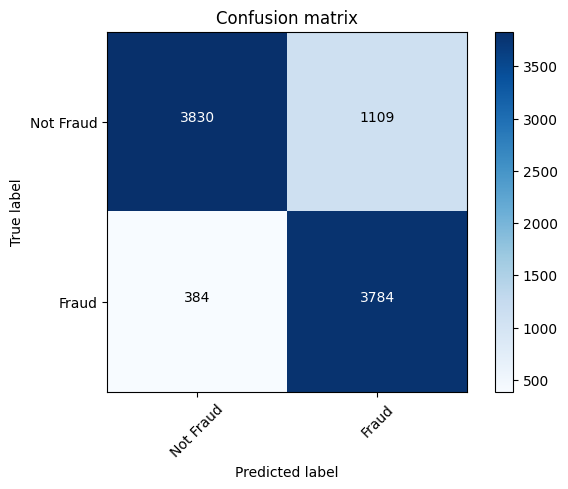

In [25]:
y_pred = nbModel_grid.predict(X_test)

#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not Fraud','Fraud'])

In [26]:
#Classification metrics
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.78      0.84      4939
       Fraud       0.77      0.91      0.84      4168

    accuracy                           0.84      9107
   macro avg       0.84      0.84      0.84      9107
weighted avg       0.85      0.84      0.84      9107



## Implement Neural Net ##

In [27]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [28]:
X_train.shape

(9106, 12)

In [87]:
model = Sequential()
model.add(Dense(86, activation='relu', input_shape=(12,)))
model.add(Dense(43, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#adam_opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 86)             │         1,118 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 43)             │         3,741 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 20)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,760 (22.50 KB)

 Trainable params: 5,760 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose = 2)

Epoch 1/10
200/200 - 1s - 5ms/step - loss: 0.3341 - recall: 0.8364 - val_loss: 0.2346 - val_recall: 0.8716
Epoch 2/10
200/200 - 0s - 1ms/step - loss: 0.2001 - recall: 0.8725 - val_loss: 0.1662 - val_recall: 0.8764
Epoch 3/10
200/200 - 0s - 1ms/step - loss: 0.1618 - recall: 0.8964 - val_loss: 0.1602 - val_recall: 0.8900
Epoch 4/10
200/200 - 0s - 1ms/step - loss: 0.1496 - recall: 0.9075 - val_loss: 0.1626 - val_recall: 0.8531
Epoch 5/10
200/200 - 0s - 1ms/step - loss: 0.1404 - recall: 0.9182 - val_loss: 0.1268 - val_recall: 0.9575
Epoch 6/10
200/200 - 0s - 1ms/step - loss: 0.1324 - recall: 0.9268 - val_loss: 0.1188 - val_recall: 0.9446
Epoch 7/10
200/200 - 0s - 1ms/step - loss: 0.1280 - recall: 0.9314 - val_loss: 0.1125 - val_recall: 0.9238
Epoch 8/10
200/200 - 0s - 1ms/step - loss: 0.1250 - recall: 0.9300 - val_loss: 0.1152 - val_recall: 0.9807
Epoch 9/10
200/200 - 0s - 1ms/step - loss: 0.1246 - recall: 0.9343 - val_loss: 0.1088 - val_recall: 0.9069
Epoch 10/10
200/200 - 0s - 1ms/step -

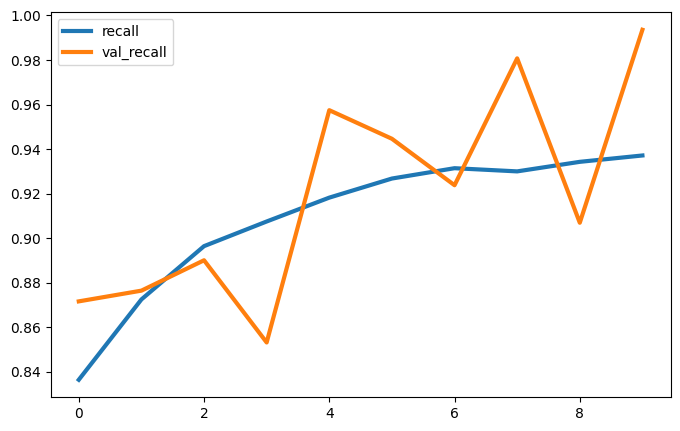

In [89]:
plt.figure(figsize = (8,5))
plt.plot(history.history['recall'], lw = 3)
plt.plot(history.history['val_recall'], lw=3)
plt.legend(['recall', 'val_recall'])

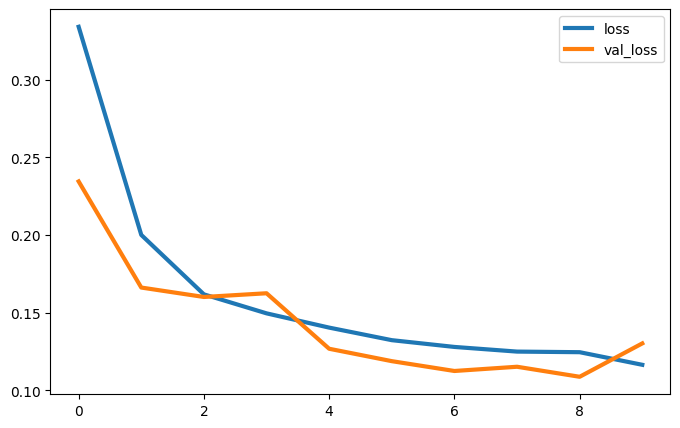

In [90]:
plt.figure(figsize = (8,5))
plt.plot(history.history['loss'], lw = 3)
plt.plot(history.history['val_loss'], lw=3)
plt.legend(['loss', 'val_loss'])